<a href="https://colab.research.google.com/github/rkoirala129/nlp/blob/main/topic_model/Topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/content/drive/MyDrive/PyTorch/ktm_post_edit.csv')
df

Unnamed: 0  ...                                              Story
0            0  ...  When the Omicron variant of Covid-19 was first...
1            1  ...  The tragedy of human life is that we often rea...
2            2  ...  If there is one thing that has remained a casu...
3            3  ...  The exchange of secret correspondence between ...
4            4  ...  The Central Bureau of Statistics has published...
5            5  ...  Almost two years since the pandemic started, t...
6            6  ...  The transition from being an agricultural coun...
7            7  ...  It was evident that the push was for growth wh...
8            8  ...  Uma Shankar Rayabhar languished in prison for ...
9            9  ...  The extraction of materials from rivers and hi...
10          10  ...  This year’s unrelenting snowfall has exacerbat...
11          11  ...  The census conducted by the Central Bureau of ...
12          12  ...  The latest report issued by Transparency Inter...
13          13  ...  Amidst all the problems confronting the Nepali...
14          14  ...  Animal conservation has seen a surge in intere...
15          15  ...  With an increase in the number of registered c...
16          16  ...  The onset of winter brings with it its own set...
17          17  ...  With the virus spreading like wildfire, the au...
18          18  ...  In what appears to be good news for Nepal’s na...
19          19  ...  Of late, incidents involving human-wildlife co...

[20 rows x 3 columns]

In [3]:
!pip install -q numpy
!pip install -q pandas
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q tensorflow
!pip install -q tensorflow_hub
!pip install -q tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install -q joblib<1.0.0

/bin/bash: 1.0.0: No such file or directory


In [4]:
!pip install -q top2vec[sentence_transformers]

In [5]:
from copy import deepcopy
from top2vec import Top2Vec


In [6]:
docs = list(df.loc[:, "Story"].values)


In [7]:
docs[:2]


['When the Omicron variant of Covid-19 was first detected in South Africa, governments worldwide resorted to a series of measures in their endeavours to contain the virus. And such efforts have been familiar with every successive wave, focusing on one particular issue; protecting the health system from being completely overwhelmed. Apart from the decimation of economies, the lasting impact has been on health. Given the gravity of the crisis, the management of Covid has been of the utmost priority for the authorities. Still, this prioritisation has come at the cost of ignoring non-communicable and other infectious diseases.Whether voluntarily or induced through the series of lockdowns, deferments of medical appointments have taken a toll on people’s health. And with the resources– both financial and human—stretched to breaking point, there is little doubt that regular health programmes have been adversely affected. People engaged in vaccinating children against hepatitis B, tuberculosis

In [8]:
print(len(docs))

20


In [9]:
docs = docs *10

In [10]:
model = Top2Vec(docs, embedding_model='universal-sentence-encoder')


2022-02-16 11:53:14,991 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-02-16 11:53:15,754 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-02-16 11:53:22,958 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-02-16 11:53:23,857 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

In [11]:
model.get_num_topics()


5

In [12]:
topic_words, word_scores, topic_nums = model.get_topics(5)
print(topic_words)
print(word_scores)

[['politicians' 'elections' 'democratic' 'electoral' 'political'
  'parliament' 'politics' 'election' 'government' 'nepali' 'nepal'
  'citizens' 'parties' 'meeting' 'decision' 'policies' 'authorities'
  'evident' 'actions' 'efforts' 'remain' 'nation' 'even' 'pandemic'
  'failed' 'minister' 'problems' 'risk' 'issues' 'mcc' 'speaker' 'cases'
  'communicable' 'held' 'rule' 'administration' 'taken' 'countries' 'few'
  'measures' 'who' 'concerning' 'crisis' 'party' 'case' 'lack' 'concerns'
  'rather' 'particular' 'population']
 ['vaccination' 'pandemic' 'communicable' 'authorities' 'public'
  'policies' 'crisis' 'who' 'citizens' 'population' 'government' 'lack'
  'diseases' 'politicians' 'taken' 'necessary' 'decision'
  'administration' 'nepal' 'risk' 'measures' 'concerns' 'nepali' 'failed'
  'political' 'people' 'mcc' 'few' 'has' 'problems' 'held' 'person'
  'virus' 'two' 'meeting' 'last' 'centre' 'politics' 'incident' 'done'
  'first' 'issues' 'one' 'increasing' 'every' 'management' 'too'

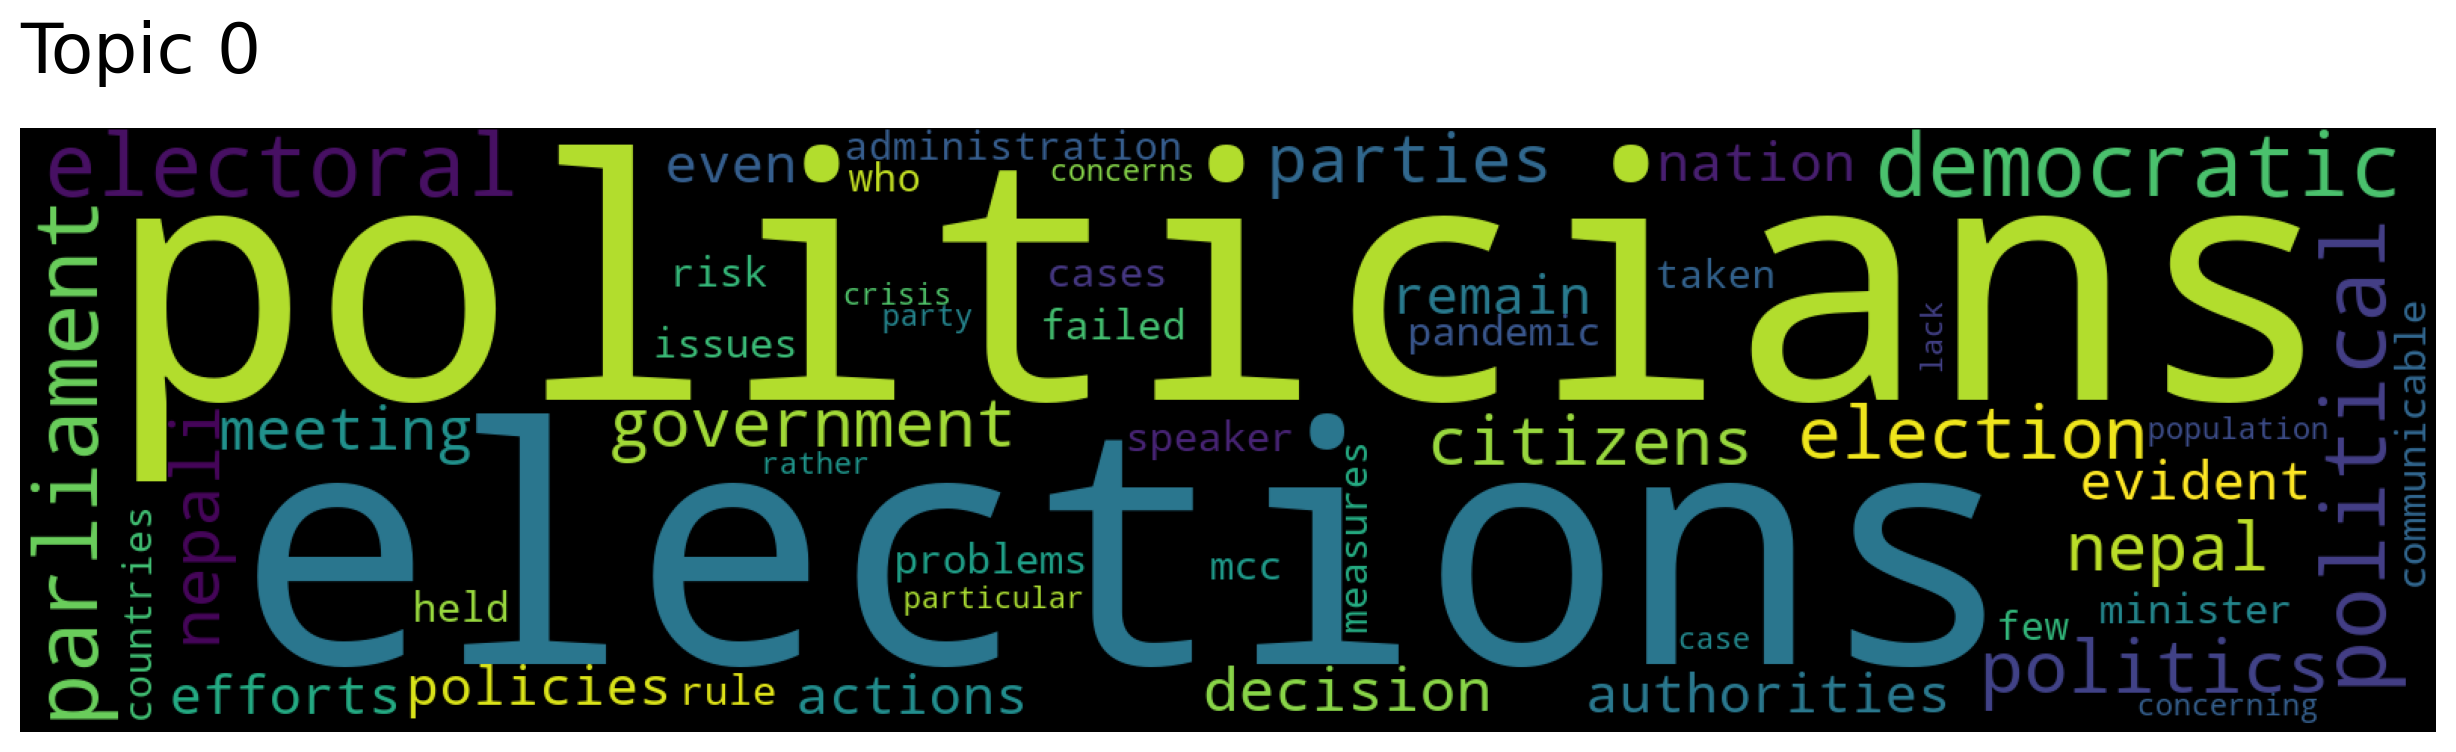

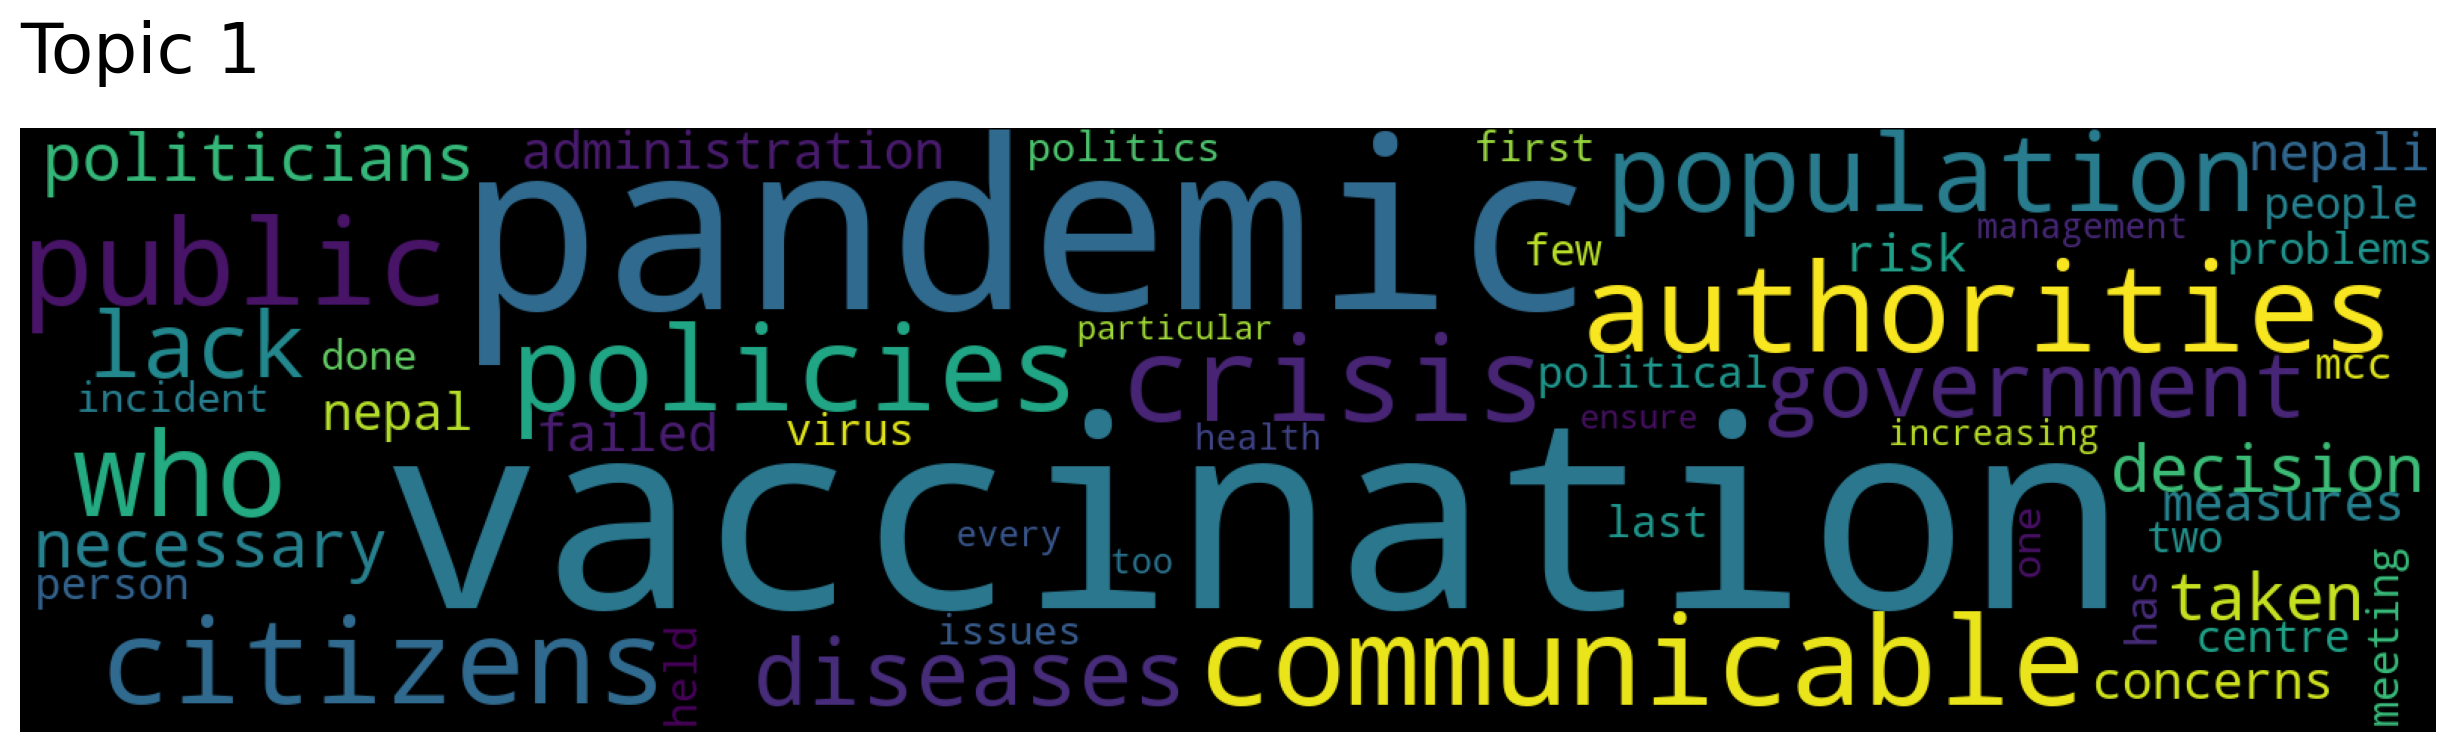

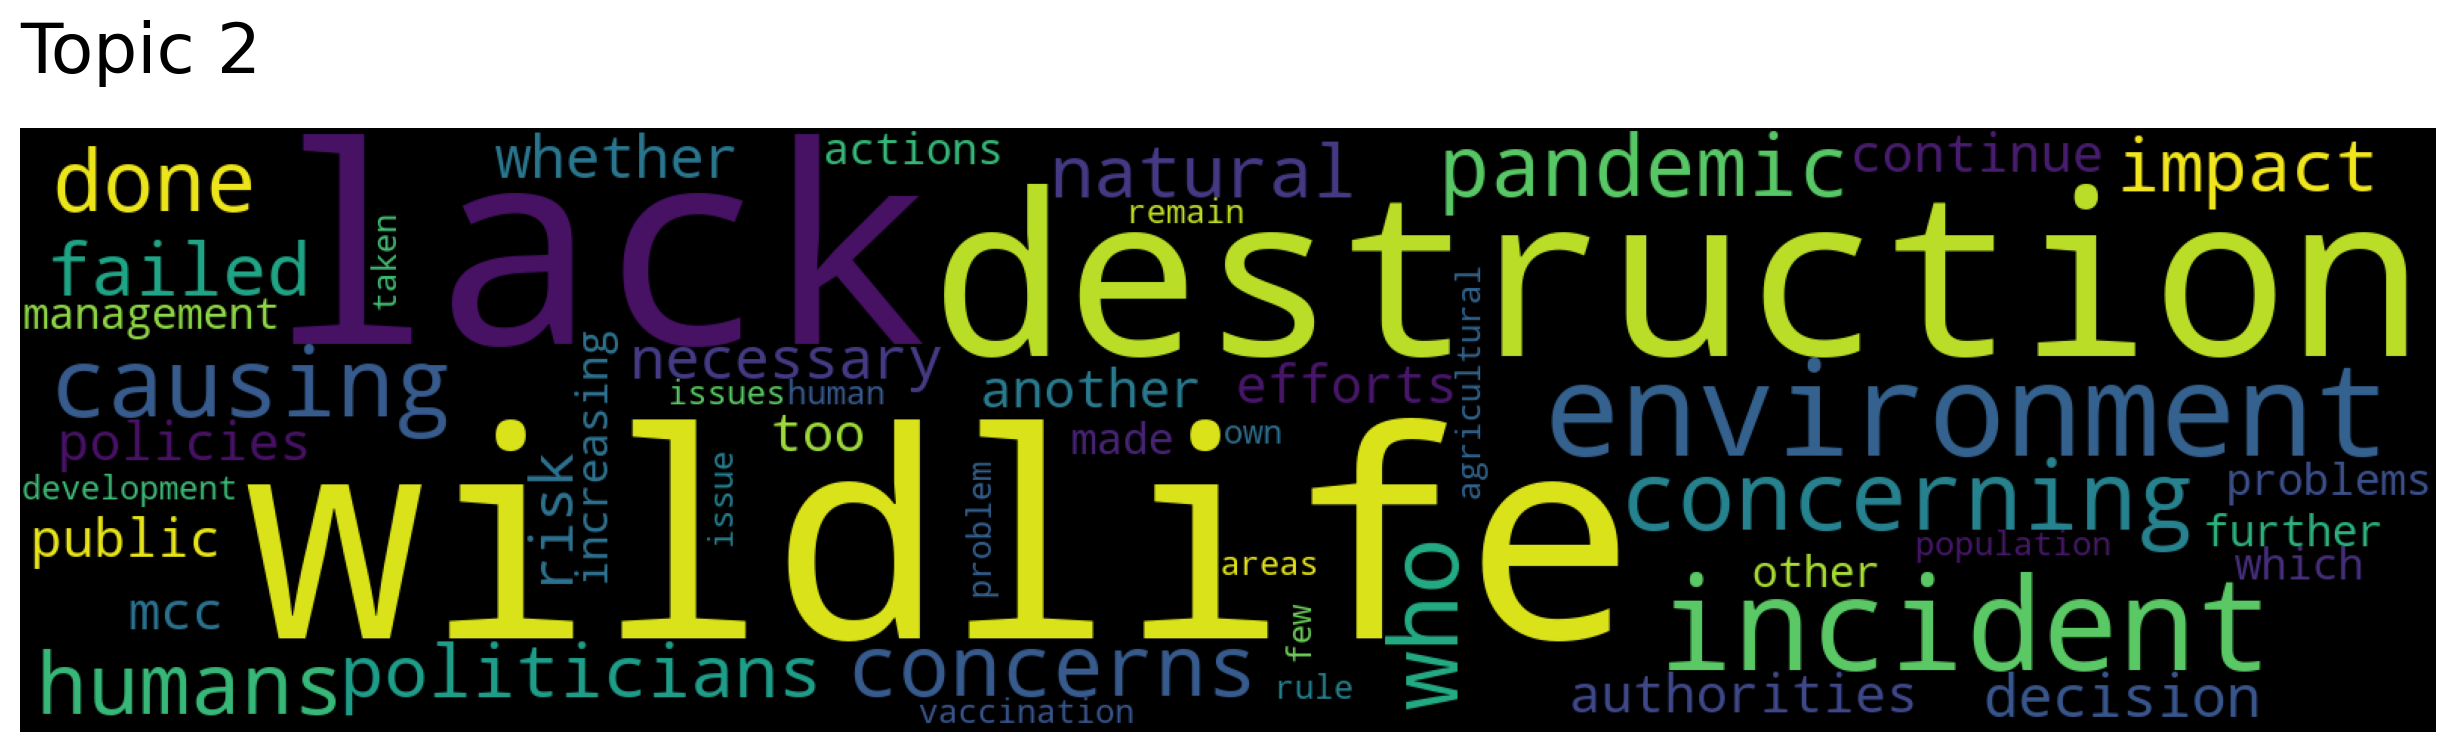

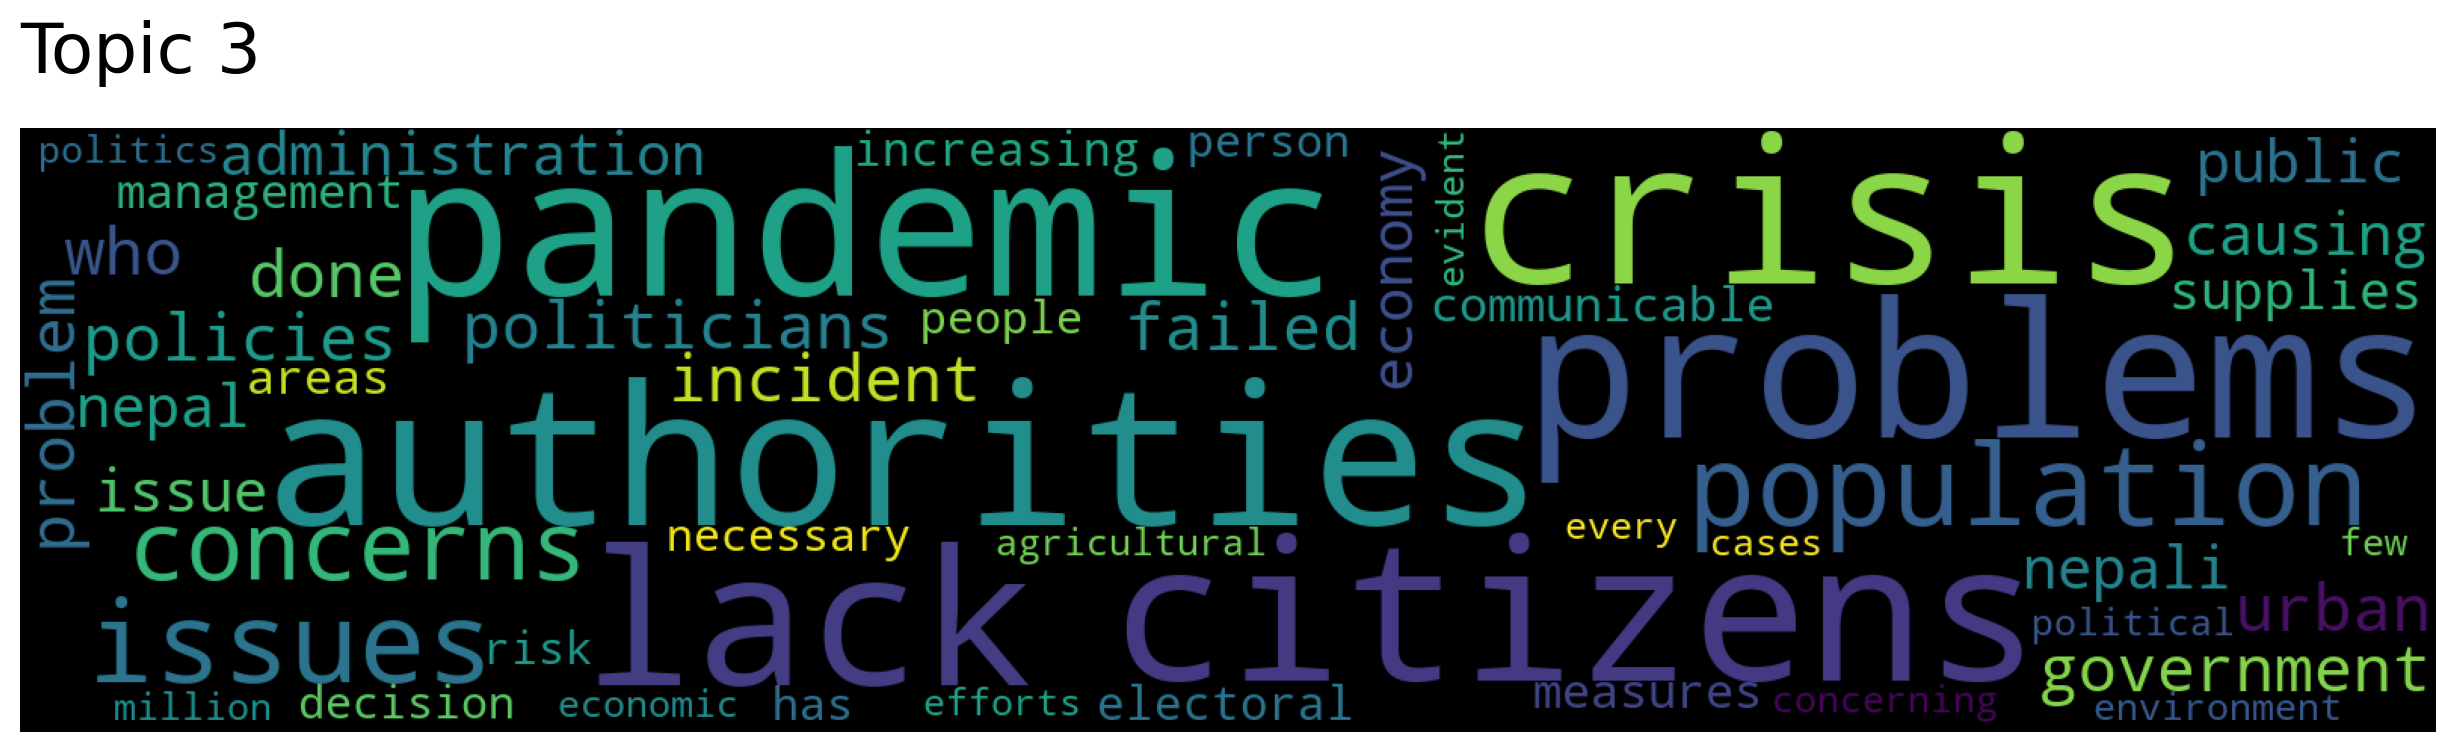

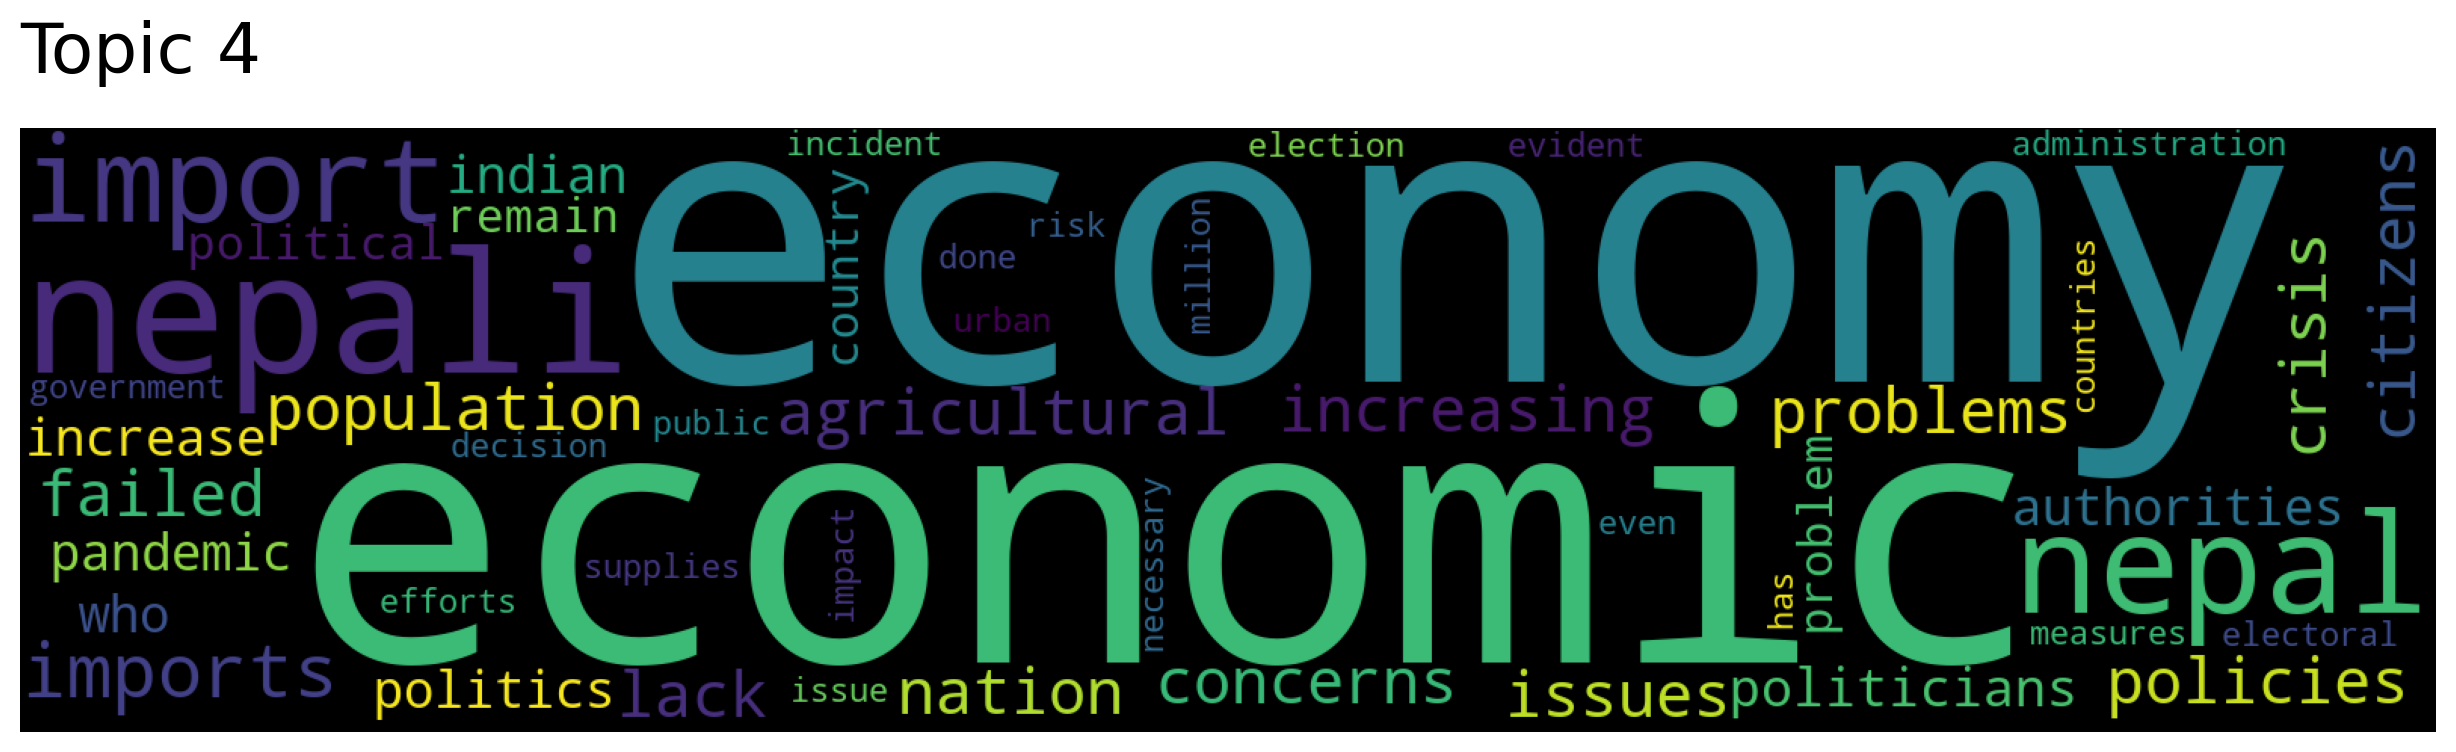

In [13]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [14]:
df.head()

Unnamed: 0  ...                                              Story
0           0  ...  When the Omicron variant of Covid-19 was first...
1           1  ...  The tragedy of human life is that we often rea...
2           2  ...  If there is one thing that has remained a casu...
3           3  ...  The exchange of secret correspondence between ...
4           4  ...  The Central Bureau of Statistics has published...

[5 rows x 3 columns]

In [15]:
df["Story"][0]

'When the Omicron variant of Covid-19 was first detected in South Africa, governments worldwide resorted to a series of measures in their endeavours to contain the virus. And such efforts have been familiar with every successive wave, focusing on one particular issue; protecting the health system from being completely overwhelmed. Apart from the decimation of economies, the lasting impact has been on health. Given the gravity of the crisis, the management of Covid has been of the utmost priority for the authorities. Still, this prioritisation has come at the cost of ignoring non-communicable and other infectious diseases.Whether voluntarily or induced through the series of lockdowns, deferments of medical appointments have taken a toll on people’s health. And with the resources– both financial and human—stretched to breaking point, there is little doubt that regular health programmes have been adversely affected. People engaged in vaccinating children against hepatitis B, tuberculosis 

In [16]:
!pip install nltk

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
text = df["Story"][0]

In [19]:
df.shape[0]

20

In [20]:
a_list = nltk.tokenize.sent_tokenize(text)


In [21]:
print(a_list)

['When the Omicron variant of Covid-19 was first detected in South Africa, governments worldwide resorted to a series of measures in their endeavours to contain the virus.', 'And such efforts have been familiar with every successive wave, focusing on one particular issue; protecting the health system from being completely overwhelmed.', 'Apart from the decimation of economies, the lasting impact has been on health.', 'Given the gravity of the crisis, the management of Covid has been of the utmost priority for the authorities.', 'Still, this prioritisation has come at the cost of ignoring non-communicable and other infectious diseases.Whether voluntarily or induced through the series of lockdowns, deferments of medical appointments have taken a toll on people’s health.', 'And with the resources– both financial and human—stretched to breaking point, there is little doubt that regular health programmes have been adversely affected.', 'People engaged in vaccinating children against hepatit

In [22]:
an_array = []
for i in range(df.shape[0]):
  new_list = nltk.tokenize.sent_tokenize(df["Story"][i])
  an_array.append(new_list)

print(an_array)


[['When the Omicron variant of Covid-19 was first detected in South Africa, governments worldwide resorted to a series of measures in their endeavours to contain the virus.', 'And such efforts have been familiar with every successive wave, focusing on one particular issue; protecting the health system from being completely overwhelmed.', 'Apart from the decimation of economies, the lasting impact has been on health.', 'Given the gravity of the crisis, the management of Covid has been of the utmost priority for the authorities.', 'Still, this prioritisation has come at the cost of ignoring non-communicable and other infectious diseases.Whether voluntarily or induced through the series of lockdowns, deferments of medical appointments have taken a toll on people’s health.', 'And with the resources– both financial and human—stretched to breaking point, there is little doubt that regular health programmes have been adversely affected.', 'People engaged in vaccinating children against hepati

In [23]:
len(an_array)

20

In [24]:
flat_list = [item for sublist in an_array for item in sublist]


In [25]:
len(flat_list)

375

In [26]:
import random
random.shuffle(flat_list)

In [27]:
#universal-sentence-encoder
#universal-sentence-encoder-multilingual
#distiluse-base-multilingual-cased

In [28]:
new_model = Top2Vec(flat_list, embedding_model='distiluse-base-multilingual-cased')


2022-02-16 11:54:10,795 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-02-16 11:54:10,866 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/607 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

2022-02-16 11:54:49,122 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-02-16 11:55:18,528 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-02-16 11:55:23,408 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-02-16 11:55:23,431 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [29]:
new_model.get_num_topics()

5

In [30]:
topic_words, word_scores, topic_nums = new_model.get_topics(5)
print(topic_words)
#print(word_scores)

[['not' 'to' 'and' 'have' 'people' 'is' 'of' 'are' 'that' 'the' 'in' 'as'
  'has' 'with' 'it' 'on' 'for' 'be' 'their']
 ['not' 'to' 'that' 'have' 'is' 'are' 'with' 'as' 'and' 'of' 'be' 'has'
  'in' 'the' 'it' 'their' 'on' 'for' 'people']
 ['have' 'people' 'not' 'to' 'that' 'in' 'has' 'are' 'is' 'for' 'and'
  'as' 'on' 'with' 'of' 'their' 'the' 'it' 'be']
 ['in' 'to' 'is' 'as' 'of' 'the' 'that' 'and' 'have' 'it' 'are' 'be'
  'not' 'has' 'on' 'with' 'for' 'their' 'people']
 ['not' 'and' 'in' 'to' 'is' 'are' 'have' 'that' 'be' 'as' 'has' 'it'
  'the' 'their' 'on' 'of' 'with' 'for' 'people']]


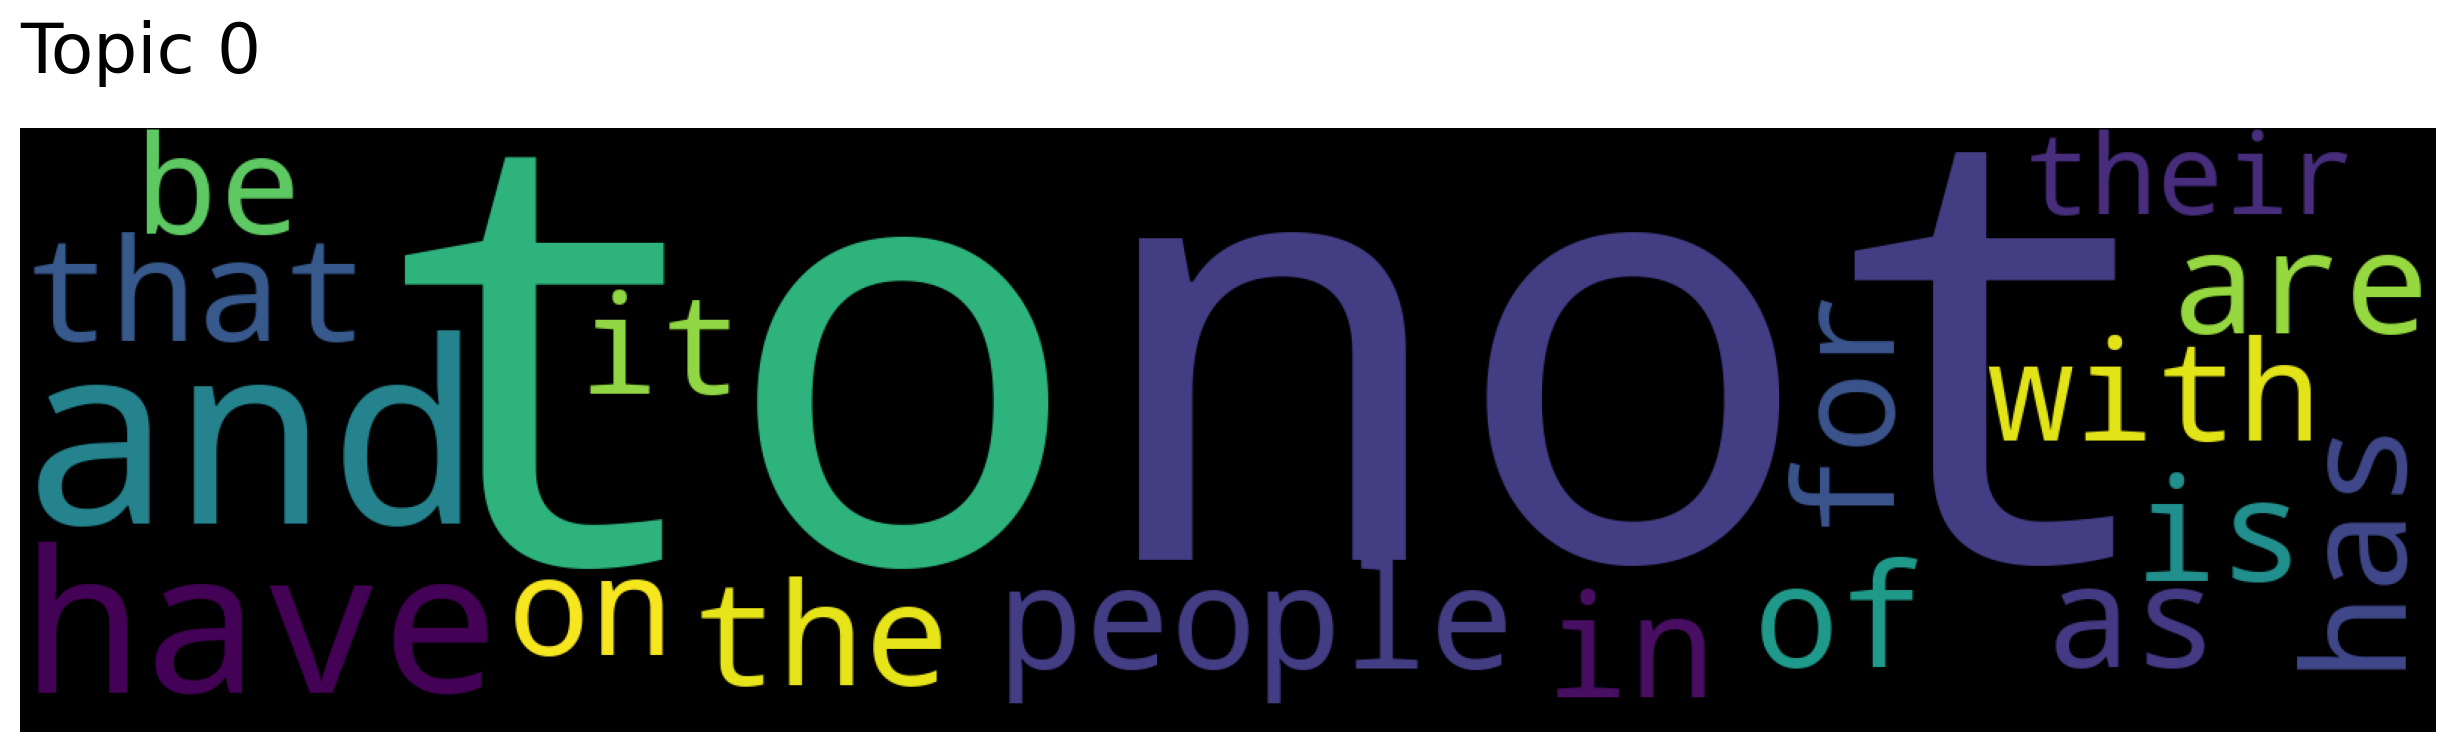

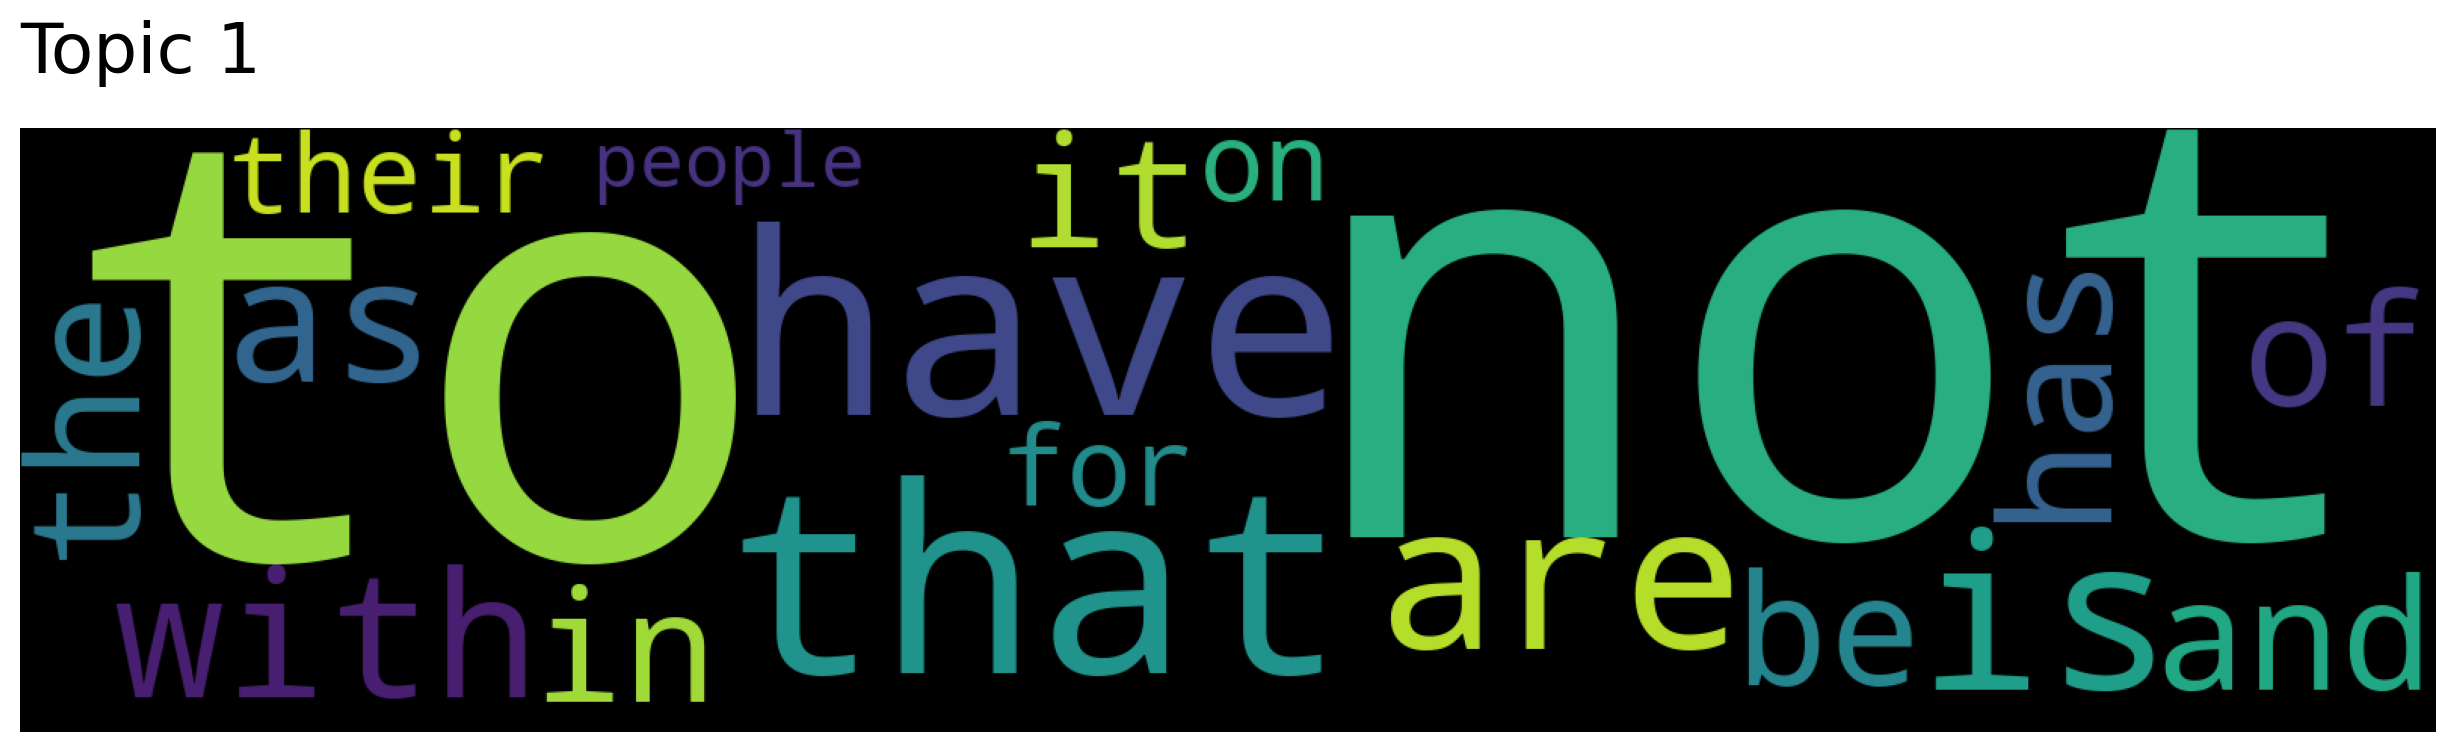

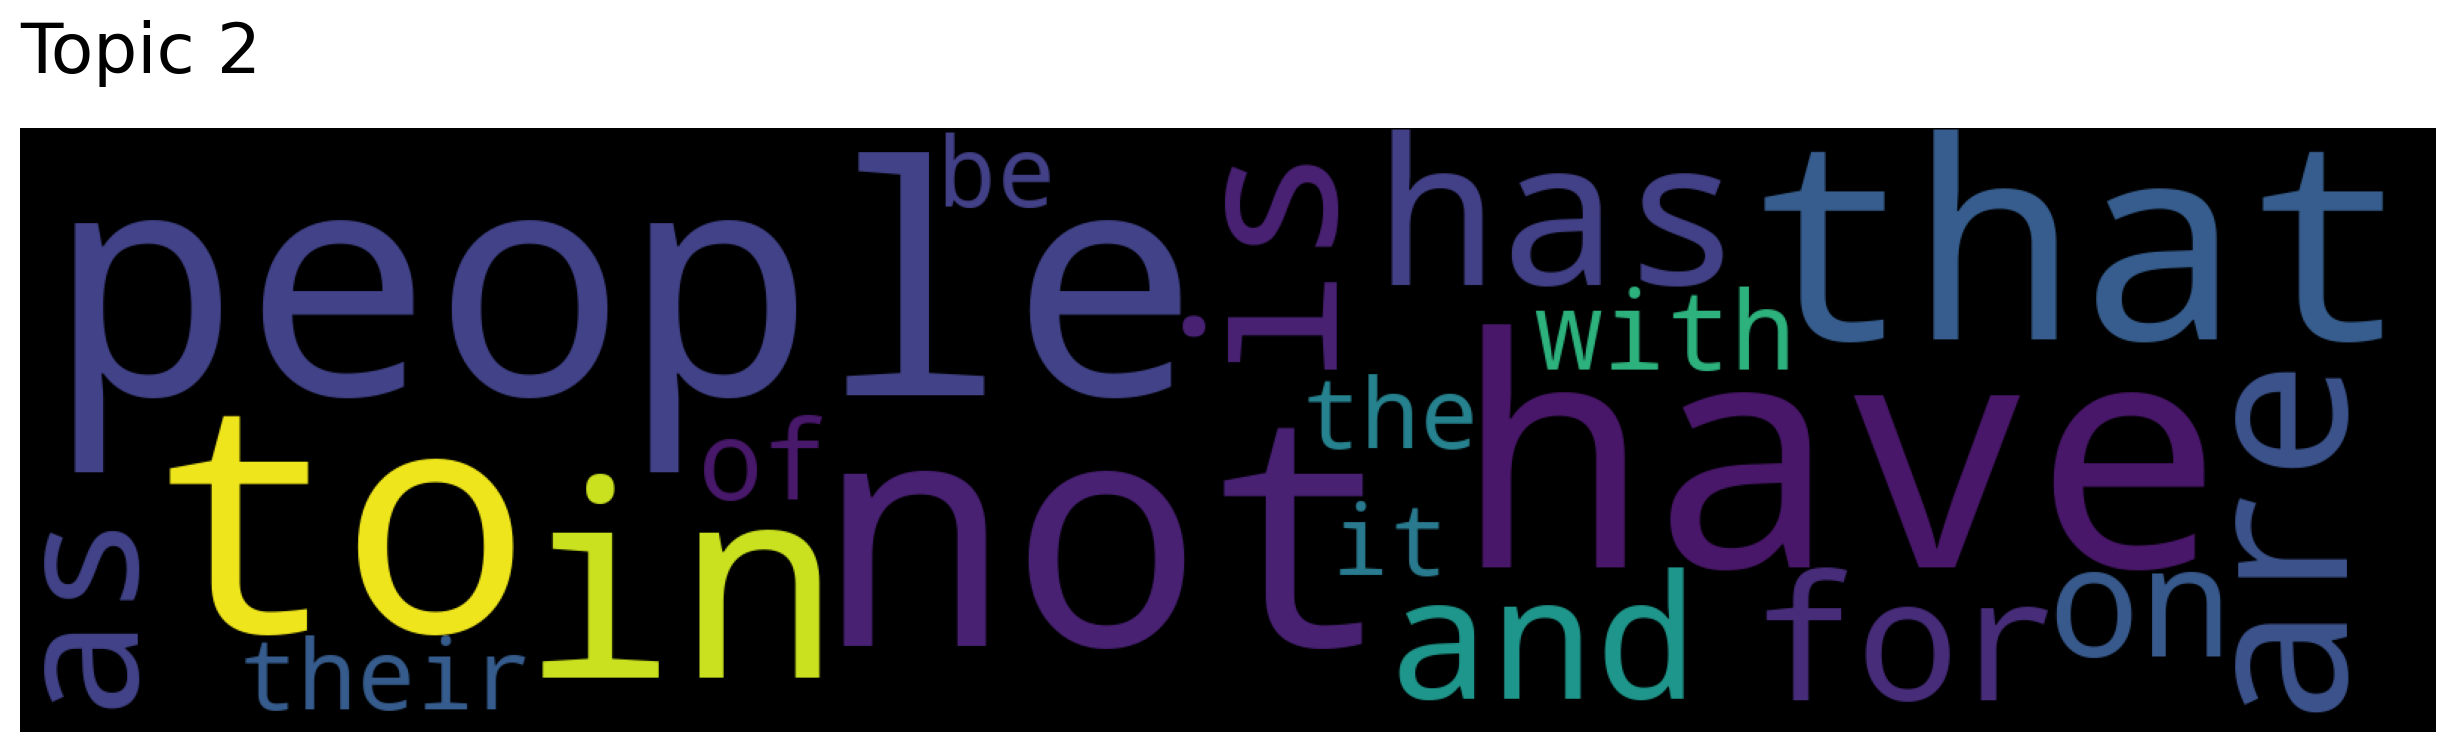

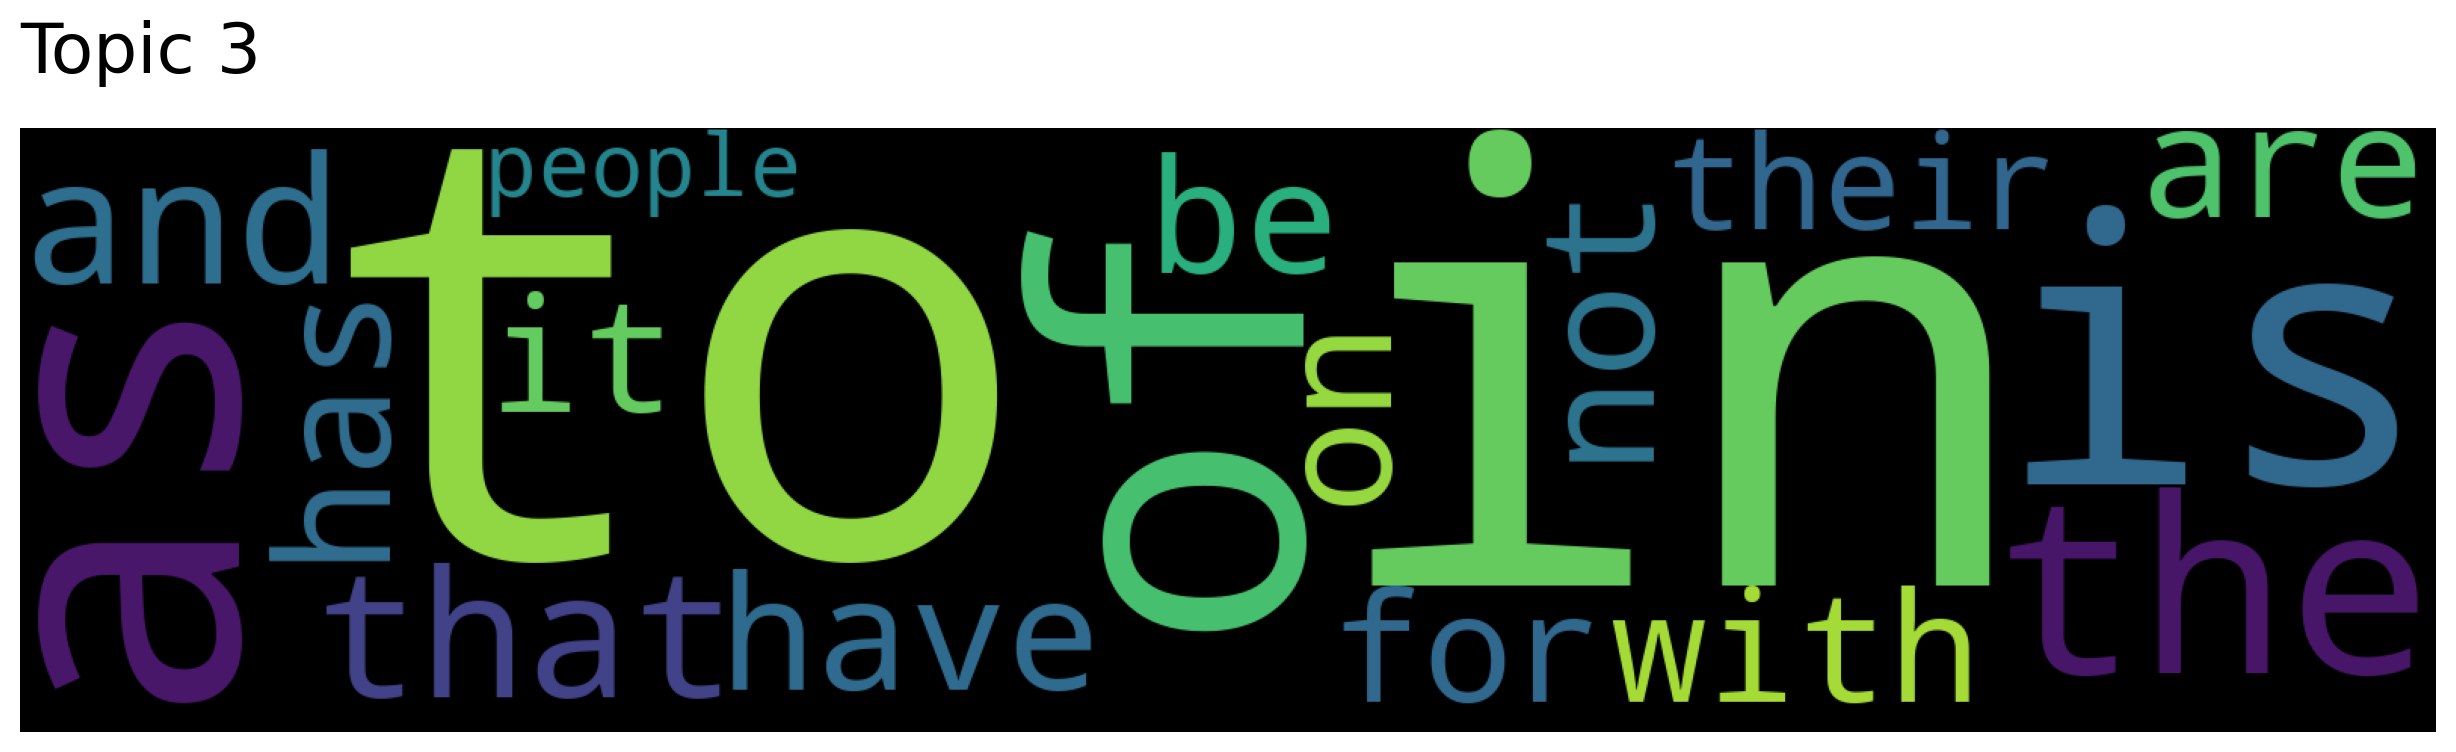

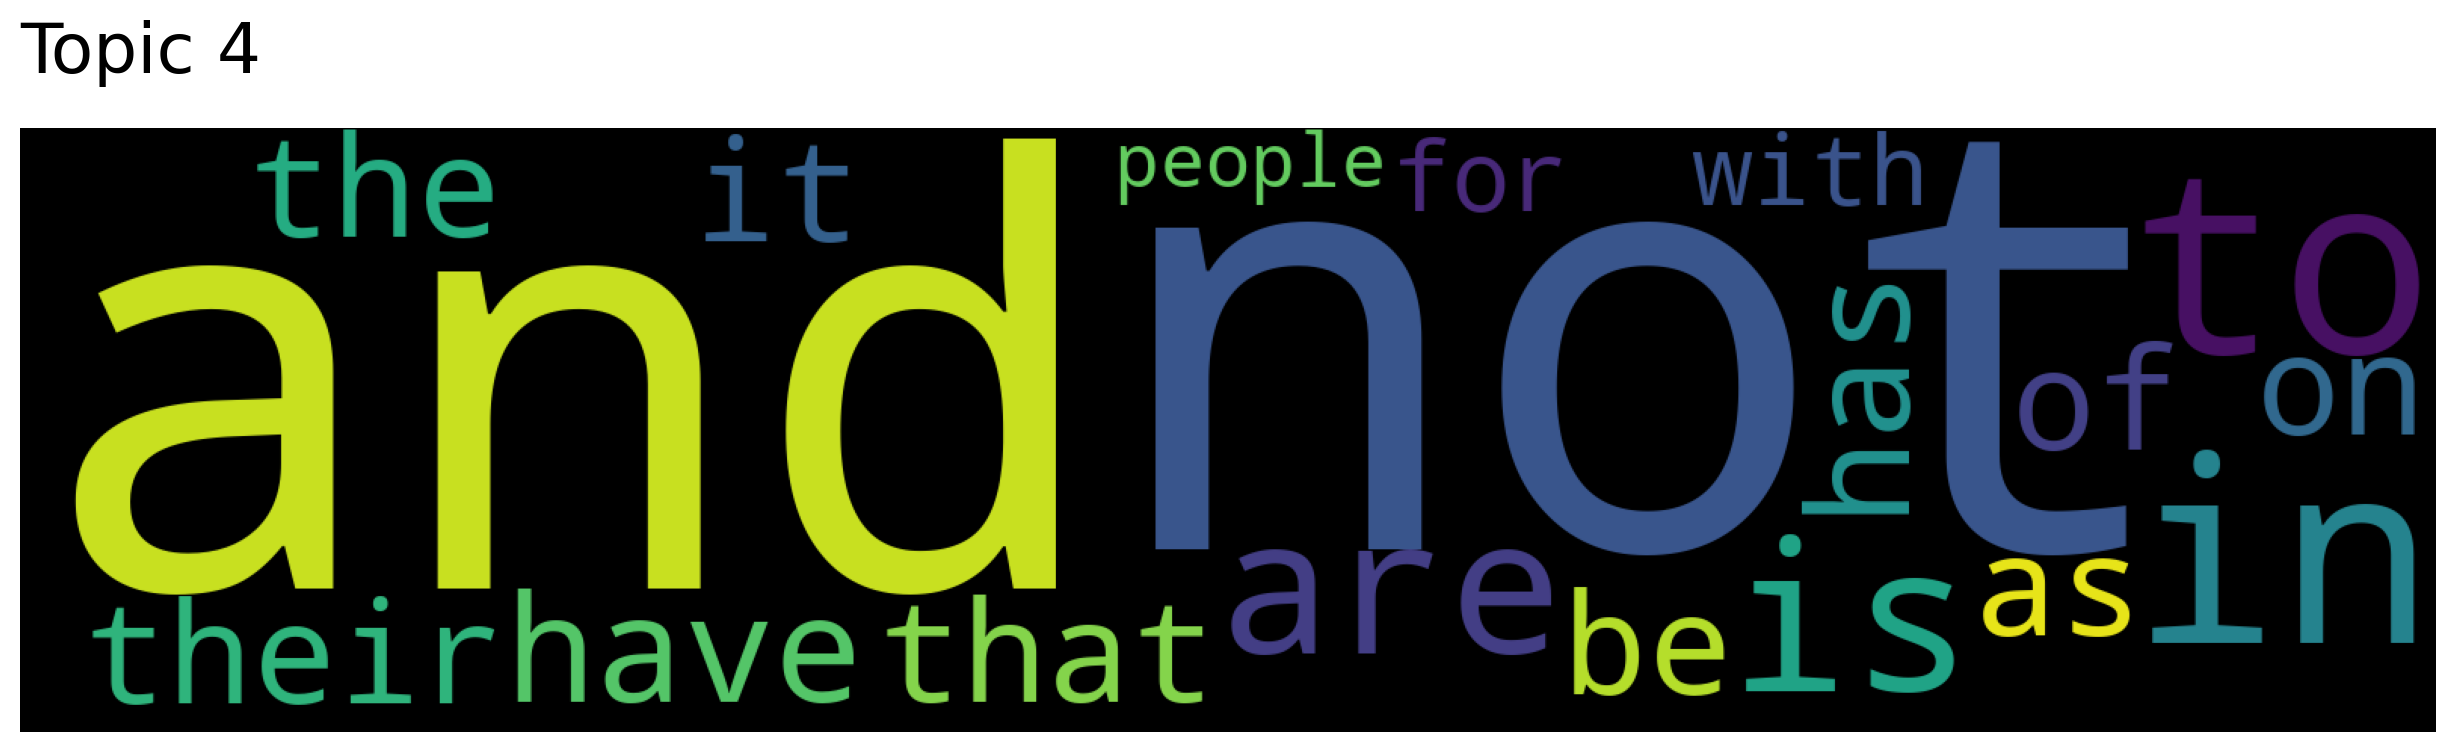

In [31]:
for topic in topic_nums:
    new_model.generate_topic_wordcloud(topic)